# 머신러닝

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import scipy as super
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [ ]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [ ]:
#%pip install pmdarima

In [ ]:
#import pmdarima as pm
#from pmdarima.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 전력 유가 환율 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/유가전력/찐유가_전력_환율_전처리.csv")
df

,날짜,두바이_유가,전력_가격,환율
0,2022-01-01,77.03,125.0,1185.5
1,2022-01-02,77.03,114.0,1185.5
2,2022-01-03,77.03,151.0,1185.5
3,2022-01-04,78.03,162.0,1190.8
4,2022-01-05,78.81,161.0,1194.3
...,...,...,...,...
301,2022-10-29,91.11,242.0,1418.1
302,2022-10-30,91.11,229.0,1418.1
303,2022-10-31,91.13,244.0,1419.3
304,2022-11-01,91.22,255.0,1422.2


In [ ]:
x_data = df[['두바이_유가', '환율']]
x_data

,두바이_유가,환율
0,77.03,1185.5
1,77.03,1185.5
2,77.03,1185.5
3,78.03,1190.8
4,78.81,1194.3
...,...,...
301,91.11,1418.1
302,91.11,1418.1
303,91.13,1419.3
304,91.22,1422.2


In [ ]:
y_data = df[['전력_가격']]
y_data

,전력_가격
0,125.0
1,114.0
2,151.0
3,162.0
4,161.0
...,...
301,242.0
302,229.0
303,244.0
304,255.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.25, shuffle = True)

In [ ]:
# 1. LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

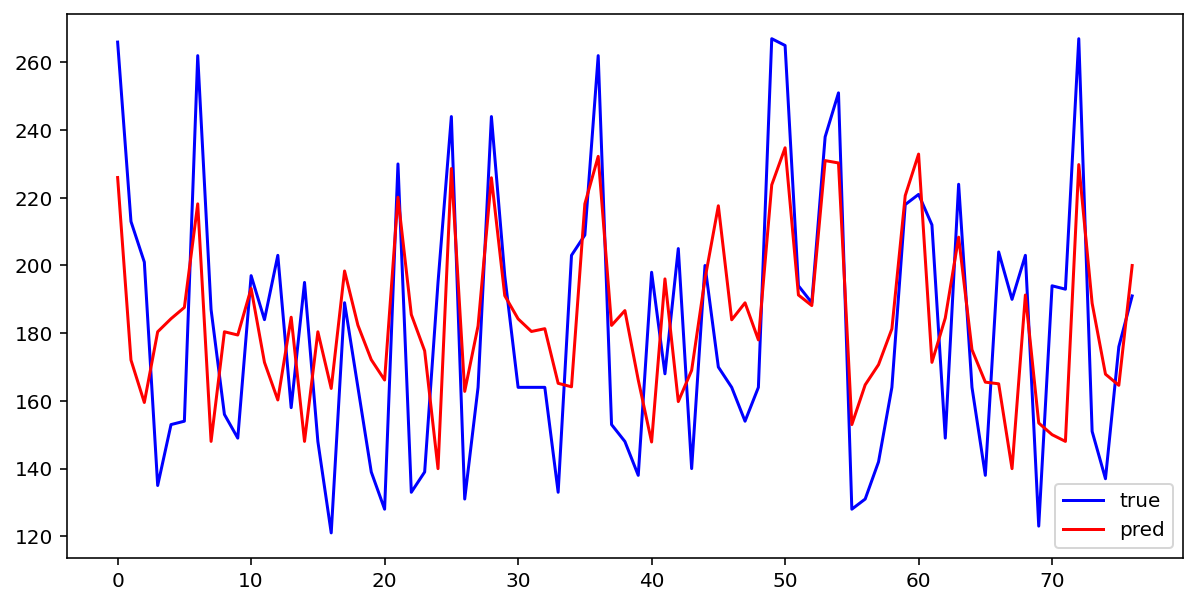

In [ ]:
Y_test['pred'] = y_pred
Y_test.reset_index(inplace=True, drop=True)

plt.figure(figsize=(10,5))
plt.plot(Y_test['전력_가격'], 'b-', label='true')
plt.plot(Y_test['pred'], 'r-', label='pred') #예측
plt.legend()

## 2. Ridge(L1)

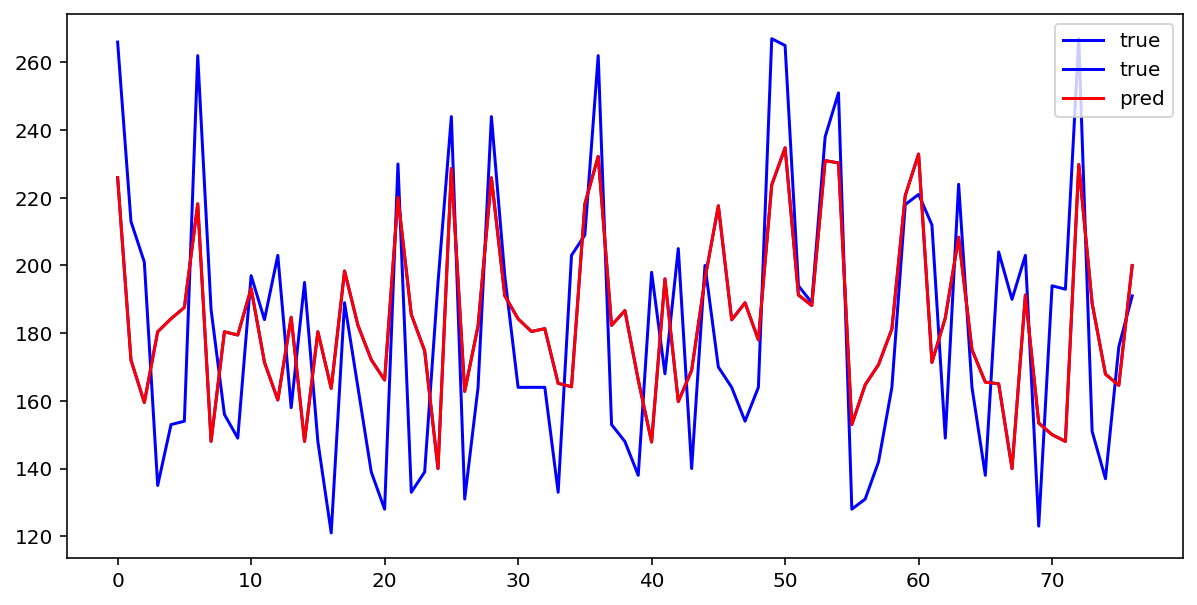

In [ ]:
# 2. Ridge(L1)
from sklearn.linear_model import Ridge, Lasso, LinearRegression
model = Ridge()
reg = model.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(Y_test, 'b-', label='true')
plt.plot(y_pred, 'r-', label='pred')
plt.legend()

## 3. Lasso(L2)

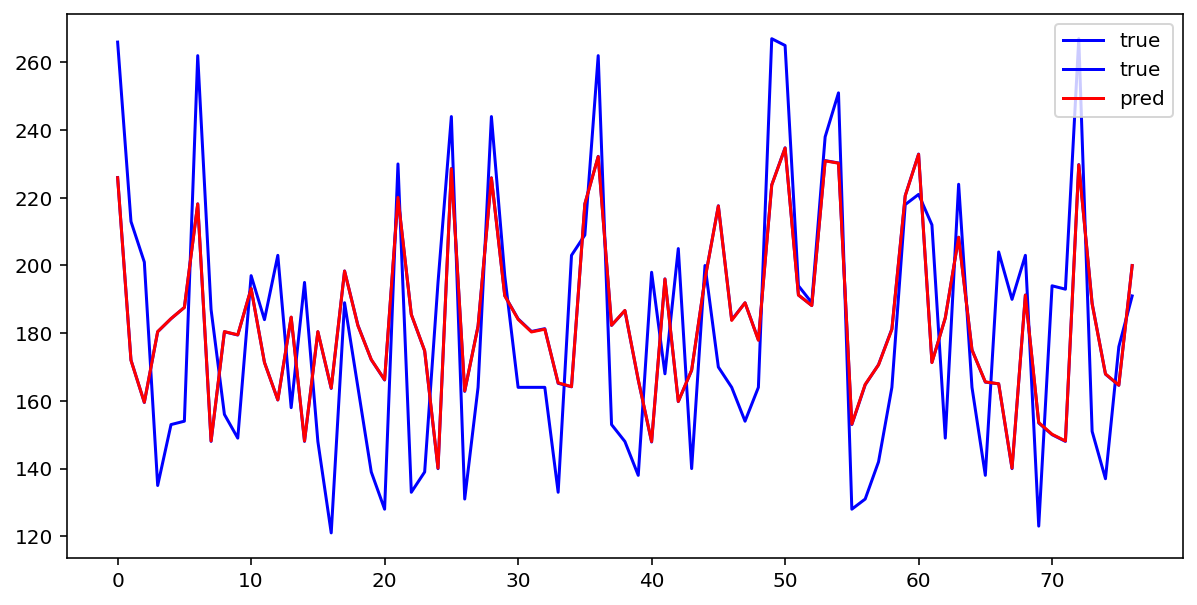

In [ ]:
# 3. Lasso(L2)
from sklearn.linear_model import Ridge, Lasso, LinearRegression
model = Lasso()
reg = model.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(Y_test, 'b-', label='true')
plt.plot(y_pred, 'r-', label='pred')
plt.legend()


# `GridSearchCV`
###  각각의 파라미터로 모델을 여러개 만들어 최적의 파라미터를 찾아주는 함수
1. 최적의 파라미터를 찾아주고, 
2. 교차검증도 해준다!

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBClassifier

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.25, shuffle = True)

In [ ]:
# 1번 2번
# 1. XGBoost.XGBClassifier()로 빈 모델을 만들고, 
# 2. XGBoost의 원하는 파라미터를 dict형태로 만들어놓고,
import xgboost as xgb
model = xgb.XGBClassifier()
param_grid = {'booster' :['gbtree'], #트리, 회귀 트리가 항상 좋음
                 'silent':[True], #running 메시지 출력 안함
                 'max_depth':[5,6,8], # 트리의 최대 깊이
                 'min_child_weight':[1,3,5], #값이 높아지면 언더 히팅
                 'gamma':[0,1,2,3],  #
                 'nthread':[4],  #병렬처리
                 'colsample_bytree':[0.5,0.8],  #변수 샘플링 해주는 비율
                 'colsample_bylevel':[0.9],  #레벨별 변수 샘플링
                 'n_estimators':[50],  #트리 개수
                 'objective':['binary:logistic'],
                 'random_state':[2]}

In [ ]:
import pydot

In [ ]:
#!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [ ]:
#!pip install cartopy
import cartopy

In [ ]:
# 3번 
# 3. KFold() 지정해주구요
cv = KFold(n_splits=6)

In [ ]:
# 4번
# 4. GridSearchCV()안에 1-3번들을 다 넣어주어 모델을 만듭니다.
gcv=GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=4)

In [ ]:
gcv

GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=False),
             estimator=XGBClassifier(), n_jobs=4,
             param_grid={'booster': ['gbtree'], 'colsample_bylevel': [0.9],
                         'colsample_bytree': [0.5, 0.8], 'gamma': [0, 1, 2, 3],
                         'max_depth': [5, 6, 8], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50], 'nthread': [4],
                         'objective': ['binary:logistic'], 'random_state': [2],
                         'silent': [True]},
             scoring='f1')

In [ ]:
# 5번
# 5. 만들어진 모델로 fit하고, 최적의 파라미터를 찾습니다.
gcv.fit(X_train.values,Y_train.values)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


final params {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.5, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 2, 'silent': True}
best score nan


In [ ]:
GCV = GridSearchCV( model,       # estimator
            param_grid=param_grid,   # 찾고자하는 파라미터. dict형식
            cv= 2 or KFold(2),
            scoring=None,  #  Classification일때  'accuracy','f1'
                           #  Regression 일때 'neg_mean_squared_error','r2'...
                           # 자세한건 아래 링크를 통해 확인 가능합니다.
            n_jobs= 4,     # 병렬 처리갯수? -1은 전부)
            refit=True     # default가 True. 
                           # 좋은 estimator로 수정되어짐.
            )   

In [ ]:
GCV.fit(X_train, Y_train)                 # train_X, train_Y 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=XGBClassifier(), n_jobs=4,
             param_grid={'booster': ['gbtree'], 'colsample_bylevel': [0.9],
                         'colsample_bytree': [0.5, 0.8], 'gamma': [0, 1, 2, 3],
                         'max_depth': [5, 6, 8], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50], 'nthread': [4],
                         'objective': ['binary:logistic'], 'random_state': [2],
                         'silent': [True]})

In [ ]:
GCV.best_params_           # 좋은 파라미터를 보여줌.
GCV.best_score_            # 0.88 좋은 estimator로
                           # 교차검증된점수를 보여줌.

0.22276887871853546

In [ ]:
# 예측방법.1
model=GCV.best_estimator_  # 최적의 파라미터로 모델 생성
model.predict(X_test)            # refit=True이기때문에 좋은 estimator로
                           # 수정되어졌으므로 바로 예측에 적용할 수 있다.

array([142., 194., 189., 137., 251., 243., 251., 164., 243., 189., 251.,
       131., 138., 195., 128., 195., 128., 190., 244., 128., 251., 221.,
       164., 212., 164., 128., 189., 243., 139., 202., 155., 138., 251.,
       190., 251., 251., 137., 251., 244., 141., 148., 204., 251., 189.,
       155., 164., 164., 156., 131., 164., 203., 164., 204., 203., 148.,
       164., 164., 164., 255., 202., 202., 243., 138., 138., 244., 243.,
       164., 164., 189., 138., 131., 189., 164., 251., 244., 195., 241.])

In [ ]:
# 예측방법2
a = GCV.predict(X_test)             # test_X,  학습후 최적의 파라미터로 예측한다.

In [ ]:
a_ = pd.DataFrame(a)
a_

,0
0,142.0
1,194.0
2,189.0
3,137.0
4,251.0
...,...
72,164.0
73,251.0
74,244.0
75,195.0


In [ ]:
b_ = Y_test[['전력_가격']]
b_

,전력_가격
0,142.0
1,129.0
2,135.0
3,138.0
4,265.0
...,...
72,208.0
73,224.0
74,253.0
75,193.0


In [ ]:
result = pd.merge(a_, b_, how='inner', left_index=True, right_index=True)
result

,0,전력_가격
0,142.0,142.0
1,194.0,129.0
2,189.0,135.0
3,137.0,138.0
4,251.0,265.0
...,...,...
72,164.0,208.0
73,251.0,224.0
74,244.0,253.0
75,195.0,193.0


In [ ]:
result = result.rename(columns={:'예측 전력가격'})
result

,예측 전력가격,실제 전력가격
0,142.0,142.0
1,194.0,129.0
2,189.0,135.0
3,137.0,138.0
4,251.0,265.0
...,...,...
72,164.0,208.0
73,251.0,224.0
74,244.0,253.0
75,195.0,193.0


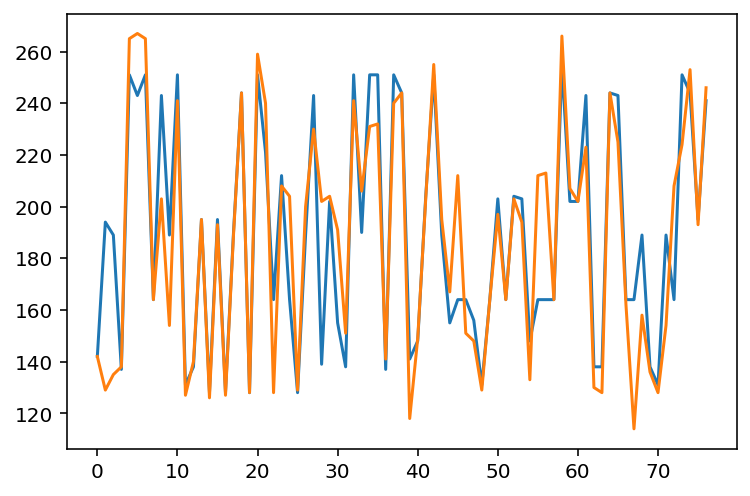

In [ ]:
plt.plot(result)
plt.show()

In [ ]:
x_data

,두바이_유가,환율
0,77.03,1185.5
1,77.03,1185.5
2,77.03,1185.5
3,78.03,1190.8
4,78.81,1194.3
...,...,...
301,91.11,1418.1
302,91.11,1418.1
303,91.13,1419.3
304,91.22,1422.2


In [ ]:
y_data

,전력_가격
0,125.0
1,114.0
2,151.0
3,162.0
4,161.0
...,...
301,242.0
302,229.0
303,244.0
304,255.0


In [ ]:
X_train

,두바이_유가,환율
0,77.03,1185.5
1,77.03,1185.5
2,77.03,1185.5
3,78.03,1190.8
4,78.81,1194.3
...,...,...
209,103.12,1304.0
210,103.12,1304.0
211,103.12,1304.0
212,97.87,1298.6


In [ ]:
X_test

,두바이_유가,환율
214,95.97,1307.2
215,94.08,1310.5
216,94.41,1309.7
217,94.41,1309.7
218,94.41,1309.7
...,...,...
301,91.11,1418.1
302,91.11,1418.1
303,91.13,1419.3
304,91.22,1422.2


In [ ]:
Y_train

,전력_가격
0,125.0
1,114.0
2,151.0
3,162.0
4,161.0
...,...
224,194.0
225,176.0
226,191.0
227,198.0


In [ ]:
Y_test

,index,전력_가격
0,131,142.0
1,151,129.0
2,197,135.0
3,125,138.0
4,293,265.0
...,...,...
72,45,208.0
73,288,224.0
74,300,253.0
75,84,193.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=2)